all carriers:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
pilot carriers: [ 0  8 16 24 32 40 48 56 63]
data carriers: [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 17 18 19 20 21 22 23 25 26 27
 28 29 30 31 33 34 35 36 37 38 39 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 57 58 59 60 61 62]


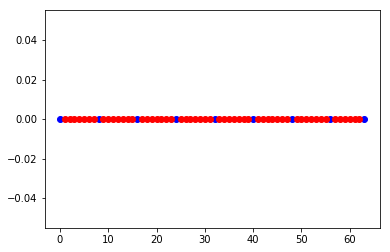

Bits count:  220
First 20 bits: [1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1]
mean of bits(should be around 0.5):  0.5
first 5 bit groups
[[1 0 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [0 1 0 1]
 [0 0 0 1]]
fitst 5 QAM symbols and bits 
[[1 0 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [0 1 0 1]
 [0 0 0 1]]
[ 3.+3.j -1.+1.j  1.+1.j -1.-1.j -3.-1.j]
number of OFDM carriers in frequency domain: 64
number of OFDM samples in time domain before CP 64
number of OFDM samples in time domain with CP 80
RX signal power: 0.2223. noise power :0.0007
Obtained bit error rate: 0.004545454545454545


array([ 0.5625    +0.8125j    ,  0.0213133 -0.24545004j,
        0.1827718 +0.18896417j, -0.17818831+0.51877298j,
        0.06732256-0.07161772j,  0.03764642-0.05071189j,
        0.6719505 -0.5398311j ,  0.03022243+0.09525982j,
        0.52810922+0.36205583j, -0.15135743+0.62667034j,
       -0.19285375-0.28055739j,  0.35446439+0.21673162j,
        0.36752061+0.17346239j, -0.08040233-0.16009614j,
       -0.43379036+0.43242626j,  0.47619931+0.33097725j,
        0.5625    +0.1875j    ,  0.08247739+0.01539121j,
        0.06440048+0.13140026j, -0.11817296+0.31832892j,
       -0.03825534+0.12870629j,  0.15178268+0.06380431j,
        0.04638308-0.19903809j,  0.22480398+0.11755625j,
        0.6455267 +0.1044733j ,  0.06913843+0.31609132j,
       -0.01235519+0.3557255j , -0.27570388-0.18297071j,
        0.0793626 +0.08207911j, -0.36836957+0.1132721j ,
        0.19756226+0.36470068j, -0.07192391-0.32480526j,
        0.375     +0.375j     ,  0.47709625-0.11716359j,
        0.27861361-0.06767582j,

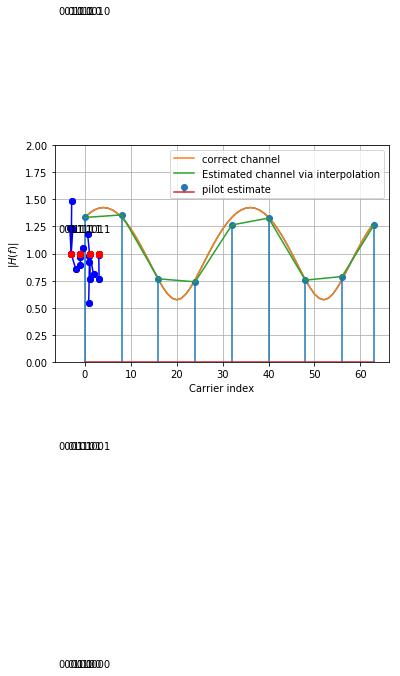

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

K=64 #number of ofdm subcarriers
CP=K//4 # length of cyclic prefix 25% of the block
P=8 #number of pilot carriers per ofdm block
pilotValue=3+3j  # the known value each pilot transmits

allCarriers=np.arange(K)  #indices of all subcarriers([0,1,...K-1])
pilotCarriers=allCarriers[::K//P]
pilotCarriers=np.hstack([pilotCarriers,np.array([allCarriers[-1]])])

P=P+1
#data carriers are all remaining carriers
dataCarriers=np.delete(allCarriers,pilotCarriers)

print("all carriers:  %s"  %allCarriers)
print("pilot carriers: %s" %pilotCarriers)
print("data carriers: %s"  %dataCarriers)

plt.plot(pilotCarriers,np.zeros_like(pilotCarriers),'bo',label='pilot')
plt.plot(dataCarriers,np.zeros_like(dataCarriers),'ro',label='data')
plt.show()

mu=4 # bits per symbol (i.e. 16 QAM)
payloadBits_per_OFDM=len(dataCarriers)*mu   # number of payload bits per ofdm symbol
mapping_table={
    (0,0,0,0) : -3-3j,
    (0,0,0,1) : -3-1j,
    (0,0,1,0): -3+3j,
    (0,0,1,1):-3+1j,
    (0,1,0,0):-1-3j,
    (0,1,0,1):-1-1j,
    (0,1,1,0):-1+3j,
    (0,1,1,1):-1+1j,
    (1,0,0,0):3-3j,
    (1,0,0,1):3-1j,
    (1,0,1,0):3+3j,
    (1,0,1,1):3+1j,
    (1,1,0,0):1-3j,
    (1,1,0,1):1-1j,
    (1,1,1,0):1+3j,
    (1,1,1,1):1+1j
}

for b3 in [0,1]:
    for b2 in [0,1]:
        for b1 in [0,1]:
            for b0 in [0,1]:
                B=(b3,b2,b1,b0)
                Q=mapping_table[B]
                plt.plot(Q.real,Q.imag,'bo')
                plt.text(Q.real,Q.imag+0.2,"".join(str(x) for x in B),ha='center')
                

                
demapping_table={v:k for k,v in mapping_table.items()}


channelResponse=np.array([1,0,0.3+0.3j]) #the impluse response of the wireless channel
H_exact=np.fft.fft(channelResponse,K)
plt.plot(allCarriers,abs(H_exact))


SNRdb=25


bits=np.random.binomial(n=1,p=0.5,size=(payloadBits_per_OFDM, ))
print("Bits count: ",len(bits))
print("First 20 bits:",bits[:20])
print("mean of bits(should be around 0.5): ",np.mean(bits))

def SP(bits):
    return bits.reshape((len(dataCarriers),mu))
bits_SP=SP(bits)
print("first 5 bit groups")
print(bits_SP[:5,:])

def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])
QAM=Mapping(bits_SP)
print("fitst 5 QAM symbols and bits ")
print(bits_SP[:5,:])
print(QAM[:5])


def OFDM_symbol(QAM_payload):
    symbol=np.zeros(K,dtype=complex) #the overall K subcarriers
    symbol[pilotCarriers]=pilotValue
    symbol[dataCarriers]=QAM_payload
    return symbol
OFDM_data=OFDM_symbol(QAM)
print("number of OFDM carriers in frequency domain:",len(OFDM_data))
    
def IDFT(OFDM_data):
    return np.fft.ifft(OFDM_data)
OFDM_time=IDFT(OFDM_data)
print("number of OFDM samples in time domain before CP",len(OFDM_time))

def addCP(OFDM_time):
    cp=OFDM_time[-CP:]
    return np.hstack([cp,OFDM_time])
OFDM_withCP=addCP(OFDM_time)
print("number of OFDM samples in time domain with CP",len(OFDM_withCP))
OFDM_withCP

def  channel(signal):
    convolved=np.convolve(signal,channelResponse)
    signal_power=np.mean(abs(convolved**2))
    sigma2=signal_power*10**(-SNRdb/10)
    print("RX signal power: %.4f. noise power :%.4f"%(signal_power,sigma2))
    
    noise=np.sqrt(sigma2/2)*(np.random.randn(*convolved.shape)+1j*np.random.randn(*convolved.shape))
    return convolved+noise
OFDM_TX=OFDM_withCP
OFDM_RX=channel(OFDM_TX)

def removeCP(signal):
    return signal[CP:(CP+K)]
OFDM_RX_noCP=removeCP(OFDM_RX)

def DFT(OFDM_RX):
    return np.fft.fft(OFDM_RX)
OFDM_demod=DFT(OFDM_RX_noCP)

def channelEstimate(OFDM_demod):
    pilots=OFDM_demod[pilotCarriers]
    Hest_at_pilots=pilots/pilotValue
    
    Hest_abs=scipy.interpolate.interp1d(pilotCarriers,abs(Hest_at_pilots),kind='linear')(allCarriers)
    Hest_phase=scipy.interpolate.interp1d(pilotCarriers,np.angle(Hest_at_pilots),kind='linear')(allCarriers)
    Hest=Hest_abs*np.exp(1j*Hest_phase)
    
    plt.plot(allCarriers,abs(H_exact),label='correct channel')
    plt.stem(pilotCarriers,abs(Hest_at_pilots),label='pilot estimate')
    plt.plot(allCarriers,abs(Hest),label='Estimated channel via interpolation')
    plt.grid(True); plt.xlabel('Carrier index');plt.ylabel('$|H(f)|$');plt.legend(fontsize=10)
    plt.ylim(0,2)
    return Hest
    
Hest=channelEstimate(OFDM_demod)

def equalize(OFDM_demod,Hest):
    return OFDM_demod/Hest

equalized_Hest=equalize(OFDM_demod,Hest)

def get_payload(equalized):
    return equalized[dataCarriers]

QAM_est=get_payload(equalized_Hest)

plt.plot(QAM_est.real,QAM_est.imag,'bo')

def Demapping(QAM):
    constellation=np.array([x for x in demapping_table.keys()])
    dists=abs(QAM.reshape((-1,1))-constellation.reshape((1,-1)))
    const_index=dists.argmin(axis=1)
    hardDecision=constellation[const_index]
    return np.vstack([demapping_table[C] for C in hardDecision]),hardDecision
PS_est,hardDecision=Demapping(QAM_est)
for qam,hard in zip(QAM_est,hardDecision):
    plt.plot([qam.real,hard.real],[qam.imag,hard.imag],'b-o')
    plt.plot(hardDecision.real,hardDecision.imag,'ro')
    
def PS(bits):
    return bits.reshape((-1,))
bits_est=PS(PS_est)

print("Obtained bit error rate:",np.sum(abs(bits-bits_est))/len(bits))

OFDM_withCP
#OFDM_TX=OFDM_withCP
#OFDM_RX=channel(OFDM_TX)
#plt.figure(figsize=(8,2))
#plt.plot(abs(OFDM_TX),label='TX_signal')
#plt.plot(abs(OFDM_RX),label='RX_signal')
#plt.legend(fontsize=10)
#plt.xlabel('time');plt.ylabel('$|x(t)|$');
#plt.grid(True)


NameError: name 'ones' is not defined

In [1]:
array?

Object `array` not found.


In [9]:
s=[]
s.append(2)
s.append(3)
s.append(4)
len(s)

3

In [10]:
plot?

Object `plot` not found.
